In [1]:
import pandas as pd
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import particle

In [2]:
particles = ak.to_dataframe(uproot.open("../10events/particles_initial.root:particles").arrays(), how="outer").reset_index(drop=True)
particles.head(3)

,event_id,particle_id,particle_type,process,vx,vy,vz,vt,px,py,...,q,eta,phi,pt,p,vertex_primary,vertex_secondary,particle,generation,sub_particle
0,0,4503599644147712,-211,0,-0.006878,0.006443,26.299278,0.0,-0.478892,0.325085,...,-1.0,-0.953069,2.545218,0.578807,0.862196,1,0,1,0,0
1,0,4503599660924928,211,0,-0.006878,0.006443,26.299278,0.0,0.369345,-0.488633,...,1.0,-0.629404,-0.923547,0.612518,0.737901,1,0,2,0,0
2,0,4503599677702144,-211,0,-0.006878,0.006443,26.299278,0.0,1.618853,-0.872867,...,-1.0,-1.899954,-0.494505,1.839180,6.285550,1,0,3,0,0


In [3]:
particles.keys()

Index(['event_id', 'particle_id', 'particle_type', 'process', 'vx', 'vy', 'vz',
       'vt', 'px', 'py', 'pz', 'm', 'q', 'eta', 'phi', 'pt', 'p',
       'vertex_primary', 'vertex_secondary', 'particle', 'generation',
       'sub_particle'],
      dtype='object')

In [4]:
gnn_ckf = pd.read_csv("../output_gnn_ckf/performance_gnn_plus_ckf.csv")
sum(gnn_ckf.matched) / len(gnn_ckf)

FileNotFoundError: [Errno 2] No such file or directory: '../output_gnn_ckf/performance_gnn_plus_ckf.csv'

In [5]:
proof_of_concept = pd.read_csv("../output_gnn_ckf/performance_proof_of_concept.csv")
sum(proof_of_concept.matched) / len(proof_of_concept)

0.9469486823855756

In [7]:
standard_ckf = pd.read_csv("../output_gnn_ckf/performance_standard_ckf.csv")
sum(standard_ckf.matched) / len(standard_ckf)

0.25933764608790566

In [30]:
missed_pids_proof_of_concept = proof_of_concept[ (proof_of_concept.event == 0) & (proof_of_concept.matched == 0) ].particle_id.to_numpy()

In [35]:
missed_particles_proof_of_concept = particles[ (particles.event_id == 0) & particles.particle_id.isin(missed_pids_proof_of_concept) ]

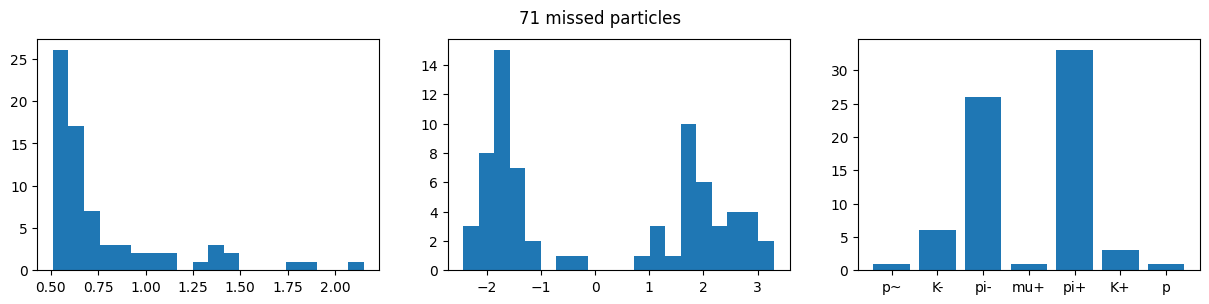

In [47]:
fig, ax = plt.subplots(1,3,figsize=(15,3))

fig.suptitle(f"{len(missed_particles_proof_of_concept)} missed particles")

_ = ax[0].hist(missed_particles_proof_of_concept.pt, bins=20)
_ = ax[1].hist(missed_particles_proof_of_concept.eta, bins=20)
pdgs, counts = np.unique(missed_particles_proof_of_concept.particle_type, return_counts=True)
pdgs = [ particle.Particle.from_pdgid(pdg).name for pdg in pdgs ]
_ = ax[2].bar(pdgs, counts)